## Descent-gradient algorithm implementation following:
    Batch method
    On-line method
### And using different loss functions:<br>
    L2 error
    Mean Square Error

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from td1.my_ai_utils import *

In [3]:
def changment(loss_function, weights, label, features):
    if loss_function == "quadratic":
        factor = -2*(label - weights.T.dot(features))
        return factor*features 
    elif loss_function == "l1":
        pass

In [4]:
def sum_changment(loss_function, weights, all_labels, all_features):
    if loss_function in {"quadratic", "MSE"}:
        delta = np.zeros(weights.shape)
        for i in range(len(all_labels)):
            delta += changment("quadratic", weights, all_labels[i], all_features[i])
        #print(f"Delta is {delta}")
    return delta if loss_function == "quadratic" else delta/len(all_labels)

In [5]:

def descent_gradient(loss_function:str, labels:np.array, record_features:np.array, nepochs:int, learning_rate:float, method="batch" or "on-line"):
    size = len(labels)

    init_shape = record_features.shape

    nweights = 1 if len(init_shape) == 1 else init_shape[1]
    weights = np.random.rand(nweights+1)

    # Adding the feature 1 for the bias node
    bias_feature = np.ones(size)

    cpy_record_features = record_features.reshape((size, 1)) if nweights == 1 else record_features
    cpy_record_features = np.hstack((cpy_record_features, bias_feature.reshape((size, 1))))
    #print(cpy_record_features, cpy_record_features[0])

    if method == "on-line":
        for _ in range(nepochs):
            for i in range(size):
                weights = weights - learning_rate*changment(loss_function, weights, labels[i], cpy_record_features[i])
    
    elif method == "batch":
        for _ in range(nepochs):
            weights = weights - learning_rate*sum_changment(loss_function, weights, labels, cpy_record_features)

    return weights

In [6]:
loss_function = "quadratic"
nepochs = 10000
learning_rate = 0.01
labels = np.array([3.5, 5.2, 4.5, 5.3, 6.5, 4.1])
features_X= np.array([0.1, 0.2, 0.3, 0.3, 0.5, 0.4])

In [7]:
w = descent_gradient(loss_function, labels, features_X, nepochs, learning_rate, "batch")


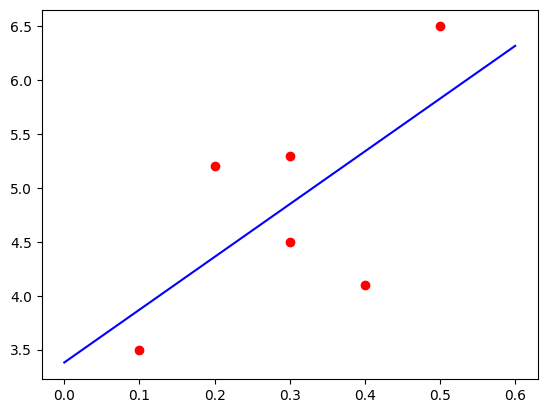

In [8]:
plt.plot(features_X, labels, 'ro', label="Original data")
z = np.linspace(0, 0.6, 100)
plt.plot(z, w[0]*z+w[-1], 'b', label="Original data")
plt.show()

In [9]:
multdm_features = np.array([
    [0.5, 3],
    [0.4, 3],
    [0.4, 4],
    [2.3, 5],
    [2.1, 5],
    [2.2, 4.5]
])

_w_ = descent_gradient("quadratic", labels, multdm_features, 10000, 0.001, "batch")
print(_w_)


[-0.3640433   0.98600319  1.30354146]


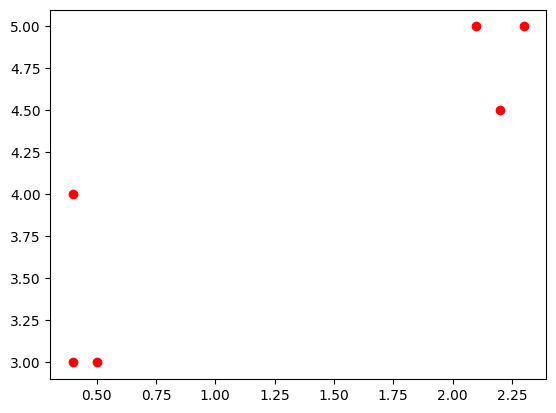

In [10]:
plt.plot(multdm_features[:, 0], multdm_features[:, 1], 'ro', label="Original data")
plt.show()

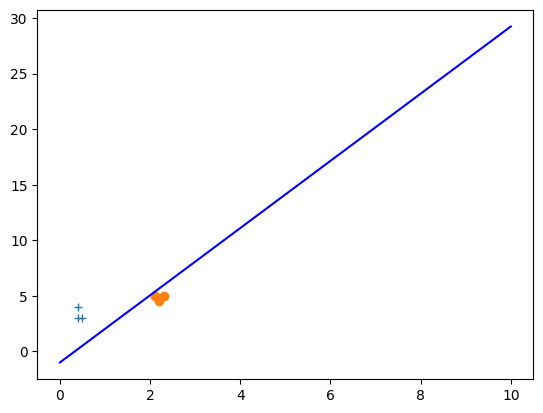

In [11]:
labels = np.array([1, 1,  1, -1, -1, -1])

def perceptron(cpy_multdm_features, labels, nepochs, learning_rate):

    init_shape = cpy_multdm_features.shape
    nweights = 1 if len(init_shape) == 1 else init_shape[1] -1
    weights = np.random.rand(nweights+1)
    

    for _ in range(nepochs):
        misclassified = 0
        delta = 0
        for i in range(len(labels)):
            cost = labels[i]*weights.T.dot(cpy_multdm_features[i])
            if cost <= 0:
                misclassified += 1
                delta += labels[i]*cpy_multdm_features[i]
        weights = weights + learning_rate*delta
    return weights

cpy_multdm_features = np.hstack((multdm_features, np.ones(len(labels)).reshape((-1, 1))))
final = perceptron(multdm_features, labels, 100, 0.1)
#print(final)
posCategorie = np.array([(multdm_features[:, 0][i], multdm_features[:, 1][i]) for i in range(len(labels)) if labels[i] == 1])
negCategorie = np.array([(multdm_features[:, 0][i], multdm_features[:, 1][i]) for i in range(len(labels)) if labels[i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')

z = np.linspace(0, 10, 10)
separator_equation = (-final[0]*z-final[-1])/final[1]
plt.plot(z, separator_equation, 'b')
plt.show()

In [12]:
import pandas as pd
iris_data = pd.read_csv("C:/Users/Junior/Documents/3A/AI/TDs/iris_a.txt", header=None)
feature_array = np.array(iris_data)
size = len(feature_array)

C:\Users\Junior\AppData\Local\Temp\ipykernel_16016\1859224570.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  e.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_16016\1859224570.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_16016\1859224570.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_16016\1859224570.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_16016\1859224570.py:39: UserWarning: Matplotlib is currently using modul

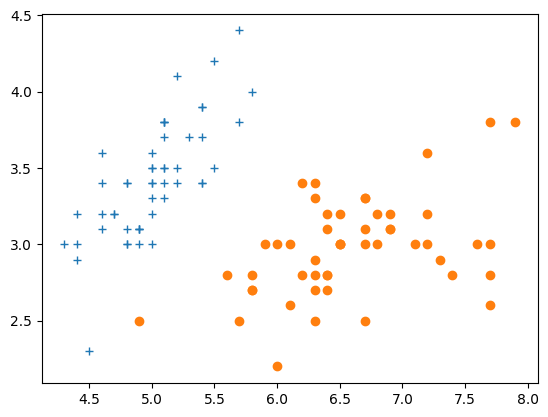

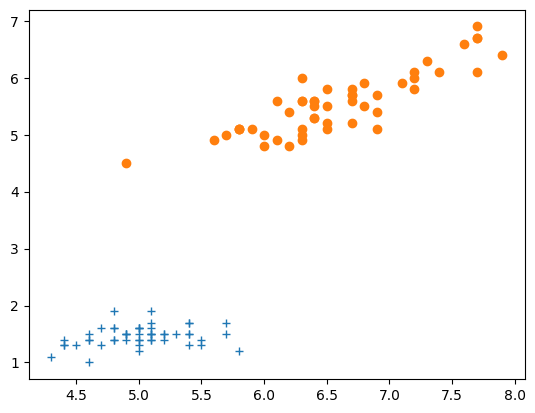

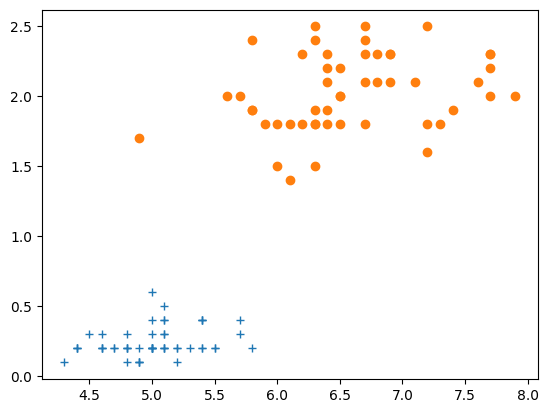

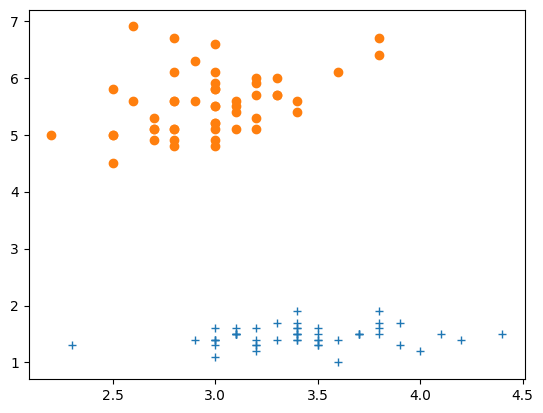

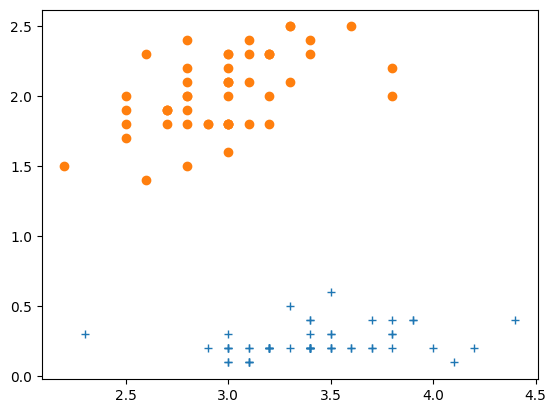

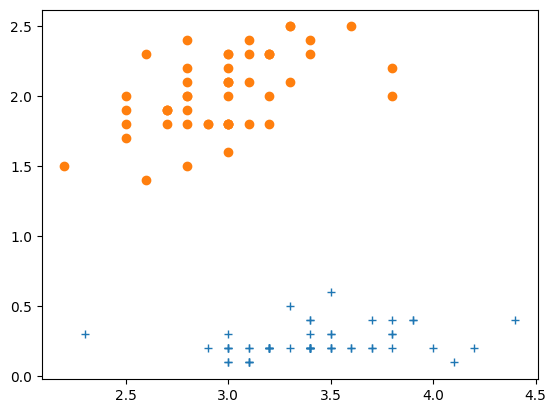

In [13]:

posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 1][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 1][i]) for i in range(size) if feature_array[:, -1][i] == -1])
e = plt.figure(0)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
e.show()


posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == -1])

f = plt.figure(1)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
f.show()

g = plt.figure(2)
posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
g.show()

h = plt.figure(3)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
h.show()

i = plt.figure(4)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
i.show()

j = plt.figure(5)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
j.show()

## Training of a Perceptron model on iris dataset

In [14]:
#print(feature_array[:, 0:2], feature_array[:, -1])

np.random.shuffle(feature_array)
#print(feature_array)
labels = feature_array[:, -1]
cpy_multdm_features = np.hstack((feature_array[:, 0:2], np.ones(len(labels)).reshape((-1, 1))))

[-2.86090396  4.82754492  0.81119375]


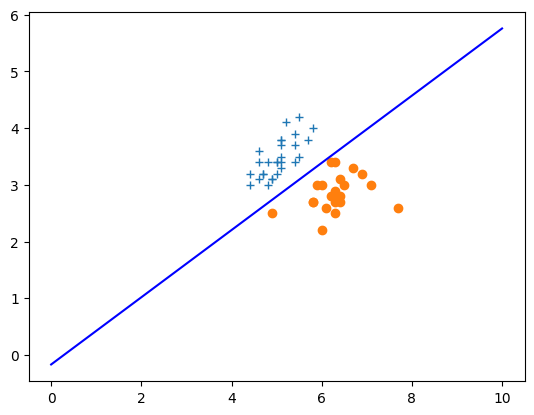

In [15]:

"""
#------------------------------------------------------------#
Splitting data in train set and test set
"""
#print(cpy_multdm_features[0:5,:])

fifty = len(labels)//2
train_set = cpy_multdm_features[0:fifty, :]
train_y = labels[0:fifty]

test_set = cpy_multdm_features[fifty: , :]
test_y = labels[fifty:]



#------------------------------------------------------------#
#Training the perceptron

iris_weights = perceptron(train_set, train_y, nepochs, learning_rate)

print(iris_weights)
posCategorie = np.array([(feature_array[0:fifty, 0][i], feature_array[0:fifty, 1][i]) for i in range(len(train_y)) if feature_array[0:fifty, -1][i] == 1])
negCategorie = np.array([(feature_array[0:fifty, 0][i], feature_array[0:fifty, 1][i]) for i in range(len(train_y)) if feature_array[0:fifty, -1][i] == -1])

#print(posCategorie)
#print(negCategorie)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')

z = np.linspace(0, 10, 10)
separator_equation = (-iris_weights[0]*z-iris_weights[-1])/iris_weights[1]
plt.plot(z, separator_equation, 'b')
plt.show()




In [16]:
#------------------------------------------------------------#
#Testing the perceptron

def predict(weights:np.array, test_set, test_y, metric="accuracy"):
    size = len(test_y)
    predictions = []

    for i in range(size):
        prediction = weights.dot(test_set[i, :])
        predictions.append(prediction)
    
    return compute_metric(predictions, test_y, "SimpleCategorisation", metric)

a,b =predict(iris_weights, test_set, test_y, "conf-mat")
print(b)

 
TP: 21 -- TN: 28 -- FP: 0 -- FN: 1 
 
[1.275399122752744, 2.0442440102574126, -3.427096501469202, -6.84236975027932, 3.1169907913126336, 3.0991792933282847, 0.9893087271865386, -3.44527680872575, 1.7759651126755525, -3.3020472063065496, -6.288000457131258, -2.8730960175933395, -6.4490415575348115, 4.565254267128014, 2.437572203001918, -2.264923421220028, -4.339170991393069, 5.745238845361539, 2.9919414961499795, -2.050447826863423, 1.561489518318951, 3.49250748607279, -1.6927426300876143, 3.403081186878839, 2.348145903807965, -2.157685624041725, -6.73513195310102, -3.3020472063065496, -2.4259645216235812, -3.1948094091282444, -3.3914735055004988, 2.8309003957464265, -2.3365382224296285, -7.70064093697794, 2.2230966086453128, -0.9595207385516524, -3.87422799743896, 3.403081186878839, -2.408153023639229, -1.2816029393587567, -3.9814657946172636, -3.963654296632913, -3.963654296632913, 1.7581536146912053, -6.073524862774655, -4.1603183930051655, 3.510318984057144, 4.189737572367853, 3.8

# Backpropagation

Epoch 0:  Loss is 1.06144722208694 
Epoch 1:  Loss is 0.18427258010281758 
Epoch 2:  Loss is 0.1247622415709494 
Epoch 3:  Loss is 0.08326161423706852 
Epoch 4:  Loss is 0.054470140366014545 
Epoch 5:  Loss is 0.03486170581987686 
Epoch 6:  Loss is 0.021831998965628447 
Epoch 7:  Loss is 0.013400640849688077 
Epoch 8:  Loss is 0.008083135746011485 
Epoch 9:  Loss is 0.004806117451296497 
Epoch 10:  Loss is 0.0028259917482388857 
Epoch 11:  Loss is 0.001648526208702629 
Epoch 12:  Loss is 0.0009569987373007488 
Epoch 13:  Loss is 0.0005545260285662214 
Epoch 14:  Loss is 0.00032167850000716116 
Epoch 15:  Loss is 0.00018738282051778508 
Epoch 16:  Loss is 0.00010995440521543324 
Epoch 17:  Loss is 6.520651302860702e-05 
Epoch 18:  Loss is 3.921082384080101e-05 
Epoch 19:  Loss is 2.398521352273608e-05 
Epoch 20:  Loss is 1.4966417524943385e-05 
Epoch 21:  Loss is 9.546271224573225e-06 
Epoch 22:  Loss is 6.231130026013058e-06 
Epoch 23:  Loss is 4.161976789517959e-06 
Epoch 24:  Loss is

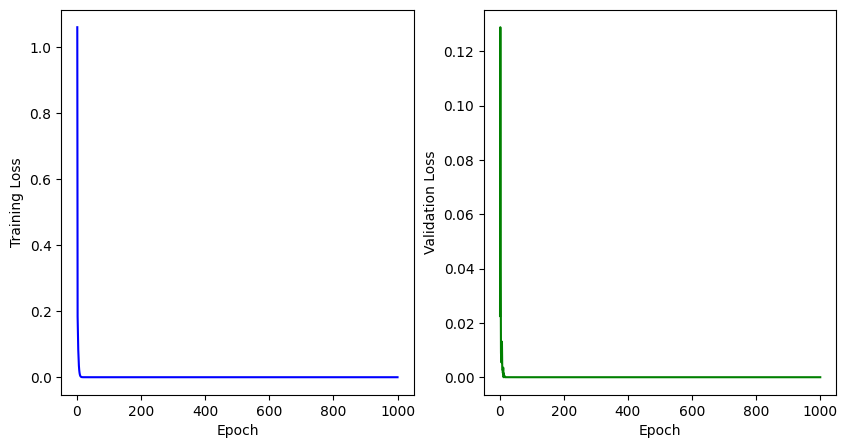


 Mean Square Error is: 1.3915506368098646e-31
 


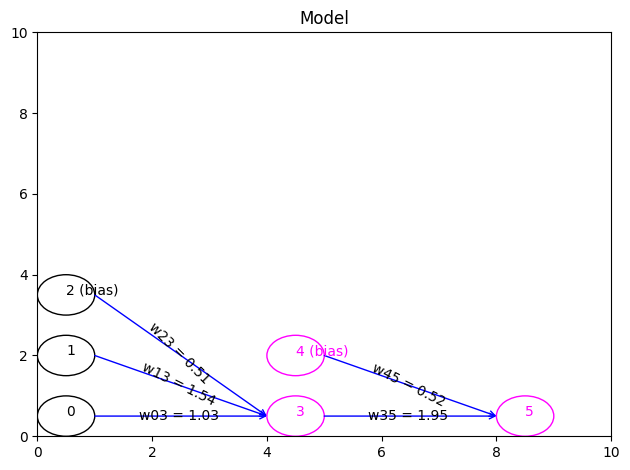

In [17]:
a = Dense(5, activation_function="reLu")

b = NetModel(input_shape=(2, ), usage="LinearRegression")
#b.add_layer(a)
b.add_layer(Dense(1, activation_function="reLu"))
b.compile()

X = np.vstack([np.random.random(100),np.random.random(100), np.ones(100)]).T
y = 2*X[:, 0] + 3*X[:, 1] + 1

b.train(X, y,"l2", nepochs= 1000, learning_rate=0.01)
b.display_losses()

X_p = np.vstack([np.random.random(100),np.random.random(100), np.ones(100)]).T
y_p = 2*X_p[:, 0] + 3*X_p[:, 1] + 1
h=b.predict_sample(X_p, y_p, "MSE")
b.draw()


Epoch 0:  Loss is 0.19252220739764733 
Epoch 1:  Loss is 0.17766068387736844 
Epoch 2:  Loss is 0.1622009833212832 
Epoch 3:  Loss is 0.14934836188399667 
Epoch 4:  Loss is 0.14042223079929686 
Epoch 5:  Loss is 0.13481143254453415 
Epoch 6:  Loss is 0.1314035817388708 
Epoch 7:  Loss is 0.1293283909025742 
Epoch 8:  Loss is 0.12803870699202216 
Epoch 9:  Loss is 0.12721323013192998 
Epoch 10:  Loss is 0.12666575311971823 
Epoch 11:  Loss is 0.12628754674948708 
Epoch 12:  Loss is 0.12601418612286644 
Epoch 13:  Loss is 0.12580685846352174 
Epoch 14:  Loss is 0.12564178075451005 
Epoch 15:  Loss is 0.12550412549173048 
Epoch 16:  Loss is 0.12538447772831493 
Epoch 17:  Loss is 0.12527673601162007 
Epoch 18:  Loss is 0.12517685080781493 
Epoch 19:  Loss is 0.1250820563804952 
Epoch 20:  Loss is 0.12499039754377919 
Epoch 21:  Loss is 0.1249004348255963 
Epoch 22:  Loss is 0.12481105876107357 
Epoch 23:  Loss is 0.12472137158994133 
Epoch 24:  Loss is 0.12463061095454125 
Epoch 25:  Loss

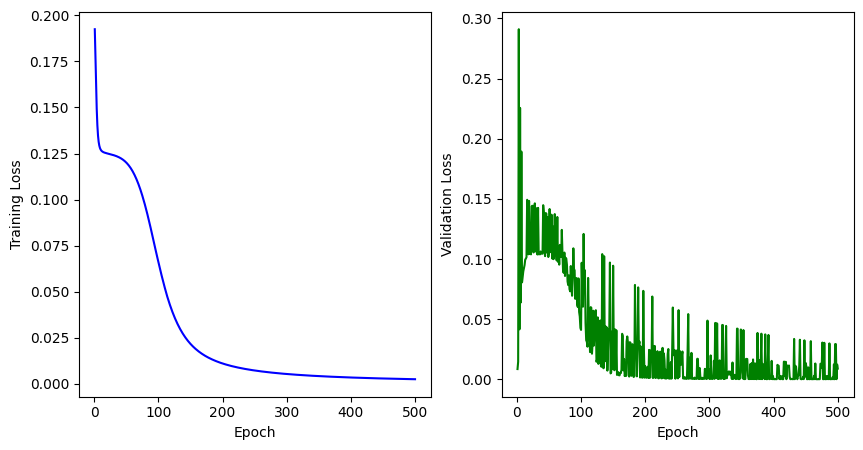


 f1 score: 0.9767441860465117 
 


In [18]:
a = Dense(2, activation_function="reLu", categories=[-1, 1])

b = NetModel(input_shape=(2, ), usage="LogisticRegression")
b.add_layer(a)
b.compile()

X = train_set
Y = np.where(train_y==-1,"Fleur ibis", "Fleur magnenta")
b.train(X, Y,"l2", nepochs= 500, learning_rate=0.01)
b.display_losses()
x = test_set
y = np.where(test_y==-1,"Fleur ibis", "Fleur magnenta")
z=b.predict_sample(x, y, metric="f1")


Epoch 0:  Loss is 1.9736436994640723 
Epoch 1:  Loss is 1.9138767676640058 
Epoch 2:  Loss is 1.892939170566112 
Epoch 3:  Loss is 1.8850322640030648 
Epoch 4:  Loss is 1.8817687350880068 
Epoch 5:  Loss is 1.8802981760070152 
Epoch 6:  Loss is 1.8795826845989667 
Epoch 7:  Loss is 1.8792118028369065 
Epoch 8:  Loss is 1.8790091081285634 
Epoch 9:  Loss is 1.8788929287418397 
Epoch 10:  Loss is 1.8788230877883179 
Epoch 11:  Loss is 1.8787788603915907 
Epoch 12:  Loss is 1.8787491581222822 
Epoch 13:  Loss is 1.8787278778343803 
Epoch 14:  Loss is 1.8787115840127977 
Epoch 15:  Loss is 1.878698307017391 
Epoch 16:  Loss is 1.8786869000406732 
Epoch 17:  Loss is 1.8786766862695763 
Epoch 18:  Loss is 1.8786672612863324 
Epoch 19:  Loss is 1.8786583805184616 
Epoch 20:  Loss is 1.8786498942102008 
Epoch 21:  Loss is 1.878641709388776 
Epoch 22:  Loss is 1.8786337673825375 
Epoch 23:  Loss is 1.878626030408076 
Epoch 24:  Loss is 1.8786184735022202 
Epoch 25:  Loss is 1.878611079633579 
E

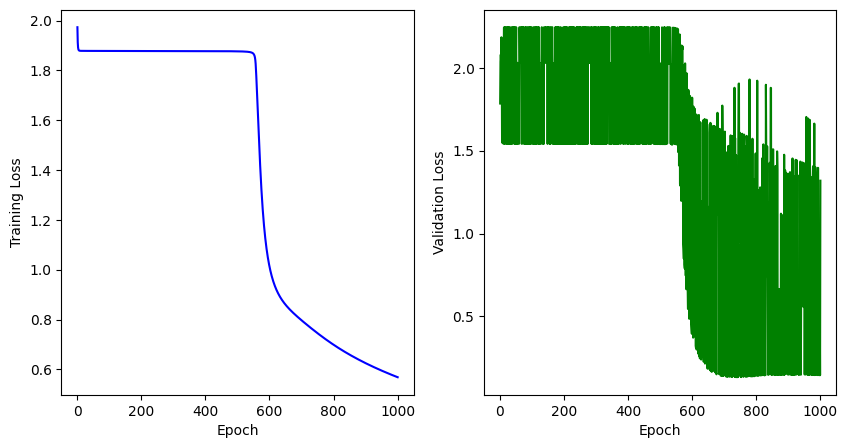

 
Your model accuracy is  89.33333333333333% on this dataset 
 


In [19]:
real_set = np.array(pd.read_csv("C:/Users/Junior/Documents/3A/AI/TDs/iris.data.csv"))
np.random.shuffle(real_set)

size = len(real_set)
X_set = real_set[:,:-1]
Y_set = real_set[:,-1]
X_set = np.hstack((X_set, np.ones(len(Y_set)).reshape((-1, 1))))

_train_set = X_set[:size//2, :]
_train_y = Y_set[:size//2]

_test_set = X_set[size//2: , :]
_test_y = Y_set[size//2:]


b = NetModel(input_shape=(4, ), usage="MultiClassification")
b.add_layer(Dense(3, activation_function="sigmoid"))

b.compile(3, categories=['Iris-setosa','Iris-versicolor', 'Iris-virginica'])

b.train(_train_set, _train_y,"cross_entropy", nepochs= 1000, learning_rate=0.01)
b.display_losses()
z = b.predict_sample(_test_set,_test_y )


In [20]:
b.save("bim_iris")
copy = load("bim_iris")

In [21]:
b.describe()
print("\n\n")
b.summarize()

Layer 0
   label  inputs  outputs
id                       
0              0        3
1              0        3
2              0        3
3              0        3
4              0        3
Layer 1
   label  inputs  outputs
id                       
5              5        3
6              5        3
7              5        3
8              0        3
Layer 2
              label  inputs  outputs
id                                  
9       Iris-setosa       4        0
10  Iris-versicolor       4        0
11   Iris-virginica       4        0



Input shape: (4,)
 Weights: [{'w05': -0.7866723183871327} {'w06': 0.46565180612223667}
 {'w07': 0.6849498083556468} {'w15': -1.441445799196451}
 {'w16': 1.0436383477516502} {'w17': 0.9103196106117385}
 {'w25': 1.8635517572635238} {'w26': 0.9176465148752321}
 {'w27': 0.8815588688348004} {'w35': 1.519705605670672}
 {'w36': 0.9082485848124136} {'w37': 0.5039390071362843}
 {'w45': -0.6826195247891544} {'w46': 0.4527238700166826}
 {'w47': 0.1253556094